# Wine quality report. It is a classification problem as the target variable quality is ordinal.

In [640]:
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import math
import scipy
from scipy import stats
from scipy.stats import zscore
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import power_transform
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
warnings.filterwarnings("ignore")

In [504]:
# Lets begin by reading the csv file
Wine=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/winequality-red.csv")

In [505]:
#Lets convert the csv file into a DataFrame
Wine_Quality=pd.DataFrame(data=Wine)
Wine_Quality

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [506]:
Wine_Quality.shape
# The dataset has 1599 rows and 12 columns

(1599, 12)

In [507]:
Wine_Quality.dtypes
# All data types except for the quality column are float type.

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [508]:
Wine_Quality.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [509]:
# the difference between the mean and the median is the most for total sulfur dioxide content and hence the univariate analysis should show more skewness to the right compared to other attributes.
# There seem to be most outliers present in total sulfur dioxide column amongst the other columns.
# The spread of data in the total sulfur dioxide column is the most amongst the other columns as the standard deviation is the highest

In [510]:
#Lets check for the missing values now
Wine_Quality.isnull().sum()
#There are no missing values

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

<AxesSubplot:>

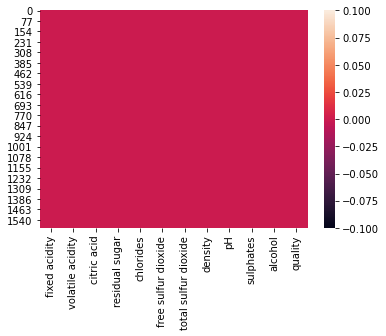

In [511]:
sns.heatmap(Wine_Quality.isnull())
#It is confirmed with the heatmap that there aare no missing values.

In [512]:
#Lets perform univariate analysis on the independent attributes

([<matplotlib.axis.XTick at 0x187fc23b0d0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

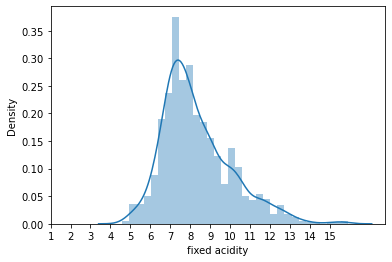

In [513]:
sns.distplot(Wine_Quality["fixed acidity"])
plt.xticks(range(1,16))
# There is skewness to the right and the maximum fixed acidity lies between 7 to 8

([<matplotlib.axis.XTick at 0x187fd792fd0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

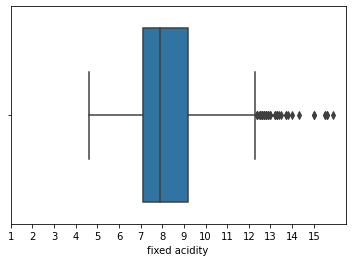

In [514]:
sns.boxplot(Wine_Quality["fixed acidity"])
plt.xticks(range(1,16))
# Outliers are present.
#Minimum fixed acidity is around 4.5, median acidity is around 8 amd maximum acidity is around 15.9
#Outliers present are treated below with IQR method

<AxesSubplot:xlabel='volatile acidity', ylabel='Density'>

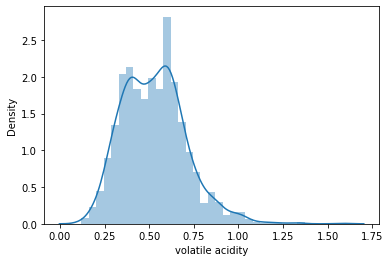

In [515]:
sns.distplot(Wine_Quality["volatile acidity"])
# There is skewness to the right and the maximum fixed acidity lies between 0.5 to 0.75

<AxesSubplot:xlabel='volatile acidity'>

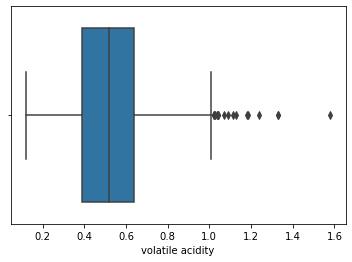

In [516]:
sns.boxplot(Wine_Quality["volatile acidity"])
# Outliers were present.
#Minimum volatile acidity is around 0.12, median acidity is around 0.5 amd maximum acidity is around 1.5
#Outliers present are treated below with IQR method

<AxesSubplot:xlabel='citric acid', ylabel='Density'>

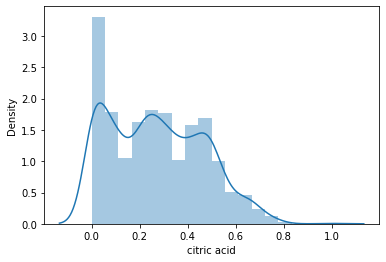

In [517]:
sns.distplot(Wine_Quality["citric acid"])
#The maximum citric acid lies between 0-0.2

<AxesSubplot:xlabel='citric acid'>

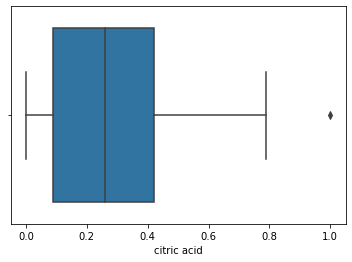

In [518]:
sns.boxplot(Wine_Quality["citric acid"])
#Minimum citric acid is around 0 median citric acid content is around 0.25 amd maximum citric acid content is around 1

<AxesSubplot:xlabel='residual sugar', ylabel='Density'>

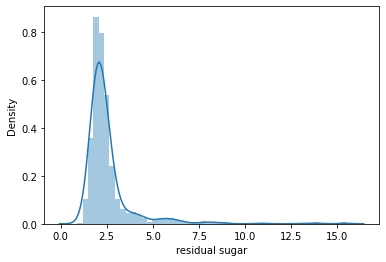

In [519]:
sns.distplot(Wine_Quality["residual sugar"])
# There is skewness to the right and the maximum residual sugar is around 2.5

([<matplotlib.axis.XTick at 0x187fd9eda00>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

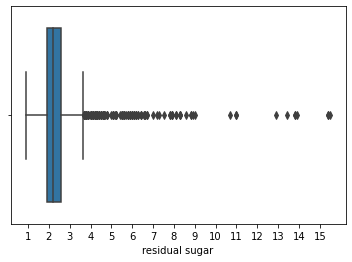

In [520]:
sns.boxplot(Wine_Quality["residual sugar"])
plt.xticks(range(1,16))
# Outliers are present.
#Minimum residual sugar is around 1 median residual sugar is around 2.1 amd maximum residual sugar is around 15.5
#Outliers present are treated below with IQR method

<AxesSubplot:xlabel='chlorides', ylabel='Density'>

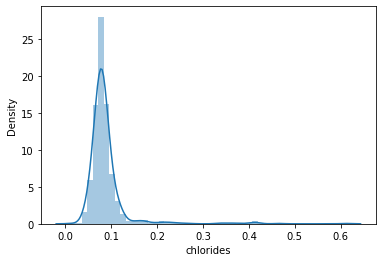

In [521]:
sns.distplot(Wine_Quality["chlorides"])
# There is skewness to the right and the maximum cholride content lies between 0-0.1

<AxesSubplot:xlabel='chlorides'>

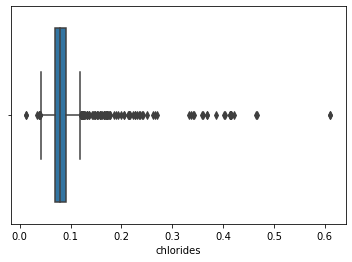

In [522]:
sns.boxplot(Wine_Quality["chlorides"])
# Outliers are present.
#Minimum chlorides is around 0.01 median chlorides content is around 0.08 amd maximum chlorides content is around 0.6
#Outliers present are treated below with IQR method

([<matplotlib.axis.XTick at 0x187fa23d520>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

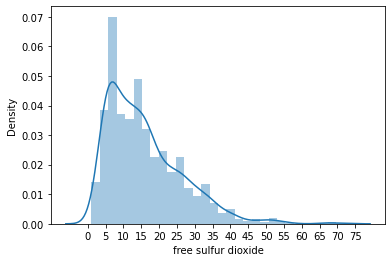

In [523]:
sns.distplot(Wine_Quality["free sulfur dioxide"])
plt.xticks(range(0,80,5))
# There is skewness to the right and the maximum free sulfur dioxide content lies between 5-10

([<matplotlib.axis.XTick at 0x187fdb88520>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

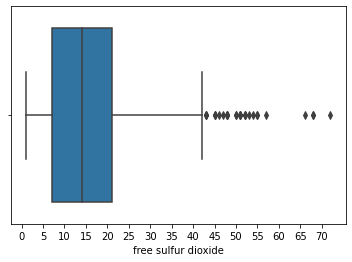

In [524]:
sns.boxplot(Wine_Quality["free sulfur dioxide"])
plt.xticks(range(0,75,5))
# Outliers are present.
#Minimum free sulfur dioxide is around 1 median free sulfur dioxide is around 15 amd maximum free sulfur dioxide is around 72

<AxesSubplot:xlabel='total sulfur dioxide', ylabel='Density'>

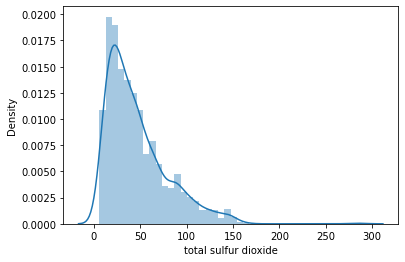

In [525]:
sns.distplot(Wine_Quality["total sulfur dioxide"])
# There is skewness to the right and the maximum free sulfur dioxide content is between 0 and 50

<AxesSubplot:xlabel='total sulfur dioxide'>

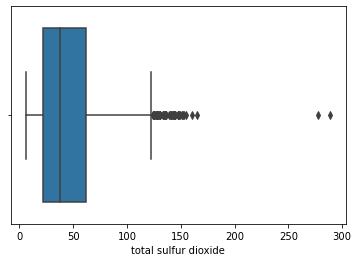

In [526]:
sns.boxplot(Wine_Quality["total sulfur dioxide"])
# Outliers are present.
#Minimum total sulfur dioxide is around 6 median free sulfur dioxide is around 38 amd maximum free sulfur dioxide is around 289

<AxesSubplot:xlabel='density', ylabel='Density'>

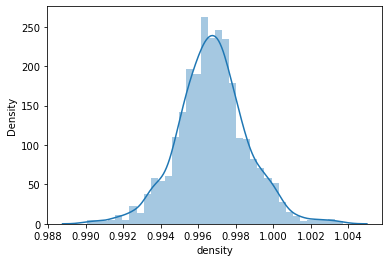

In [527]:
sns.distplot(Wine_Quality["density"])
# There is skewness to the left and the maximum density is between 0.996 to 0.998

<AxesSubplot:xlabel='density'>

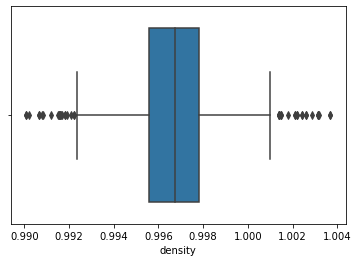

In [528]:
sns.boxplot(Wine_Quality["density"])
# Outliers are present.
#Minimum total density is around 0.990 median density is around 0.997 amd maximum density is around 1.

<AxesSubplot:xlabel='pH', ylabel='Density'>

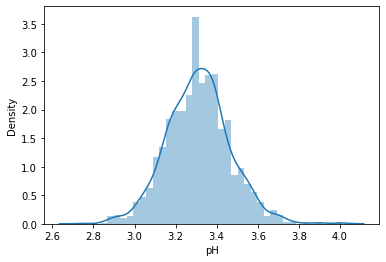

In [529]:
sns.distplot(Wine_Quality["pH"])
# There is skewness to the right and the maximum pH is between 3.2 to 3.4

<AxesSubplot:xlabel='pH'>

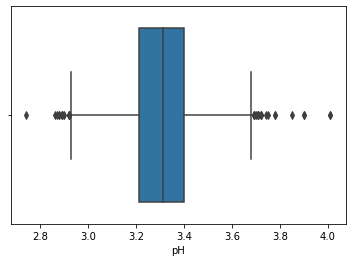

In [530]:
sns.boxplot(Wine_Quality["pH"])
# Outliers are present.
#Minimum pH is around 2.7 median pH is around 3.31 amd maximum pH is around 4.

<AxesSubplot:xlabel='sulphates', ylabel='Density'>

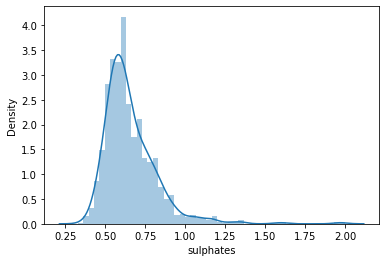

In [531]:
sns.distplot(Wine_Quality["sulphates"])
# There is skewness to the right and the maximum sulphate content is between 3.2 to 3.4

<AxesSubplot:xlabel='sulphates'>

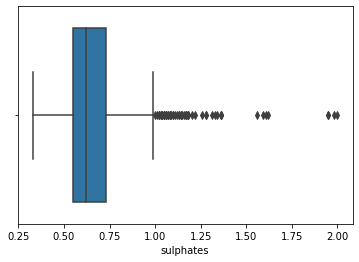

In [532]:
sns.boxplot(Wine_Quality["sulphates"])
# Outliers are present.
#Minimum sulphate content is around .33 median pH is around 0.62 amd maximum pH is around 2

<AxesSubplot:xlabel='alcohol', ylabel='Density'>

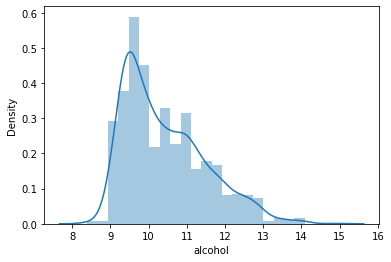

In [533]:
sns.distplot(Wine_Quality["alcohol"])
# There is skewness to the right and the maximum alcohol content is between 9 to 10

<AxesSubplot:xlabel='alcohol'>

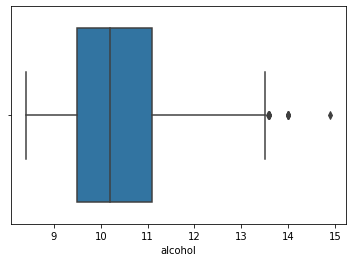

In [534]:
sns.boxplot(Wine_Quality["alcohol"])
# Outliers are present.
#Minimum sulphate content is around 8.4 median pH is around 10.2 amd maximum pH is around 14.9

In [535]:
#Lets perform bivariate analysis

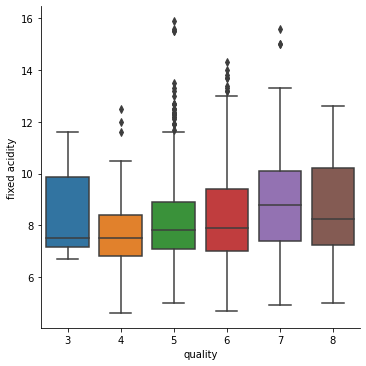

In [536]:
sns.catplot(x="quality",y="fixed acidity",kind="box",data=Wine_Quality)
#the median is highest when quality is 7 where the fixed acidity is around 9.
#the maximum outliers are present when the quality is 5
#the range between minimum and maximum values is the most when quality is 6 and 7

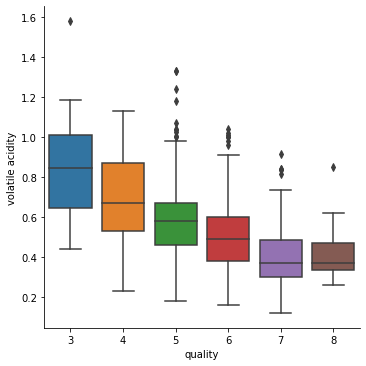

In [537]:
sns.catplot(x="quality",y="volatile acidity",kind="box",data=Wine_Quality)
#the maximum outliers are present when the quality is 5
#the median is highest when quality is 3 where volatile acidity is 0.85
#the range between minimum and maximum values is the most when quality is 4

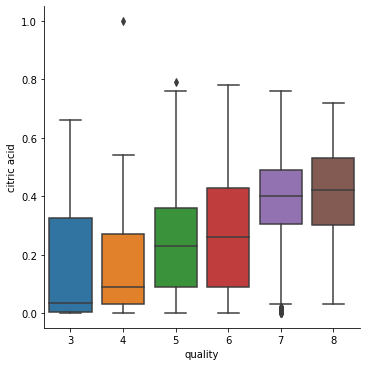

In [538]:
sns.catplot(x="quality",y="citric acid",kind="box",data=Wine_Quality)
#the median is the highest when quality is 8 where citric acid content is around 0.4
#the range between the minimum and maximum values is the most when quality is 6

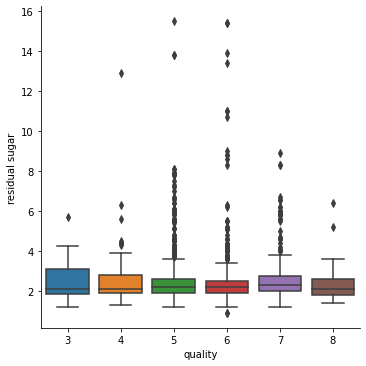

In [539]:
sns.catplot(x="quality",y="residual sugar",kind="box",data=Wine_Quality)
#the outliers are highest when the quality is 5 and 6
#the median is the highest when quality is 7 where the residual sugar is 2.3

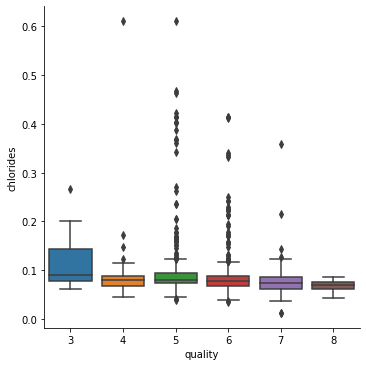

In [540]:
sns.catplot(x="quality",y="chlorides",kind="box",data=Wine_Quality)
#the outliers are highest when the quality is 5
#median is the highest when the quality is 3 where chloride content is 0.08.

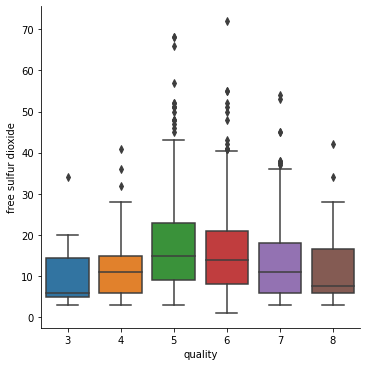

In [541]:
sns.catplot(x="quality",y="free sulfur dioxide",kind="box",data=Wine_Quality)
#the outliers are highest when the quality is 5 and 6
#median is the highest when the quality is 5 where free sulfur dioxide content is 14

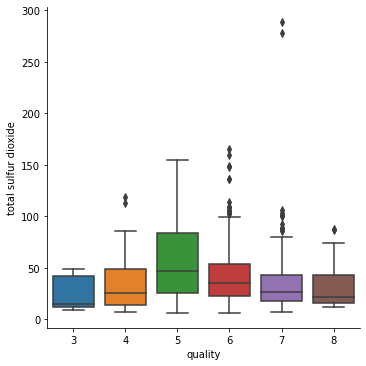

In [542]:
sns.catplot(x="quality",y="total sulfur dioxide",kind="box",data=Wine_Quality)
#the outliers are highest when the quality is 6 and 7
#median is the highest when the quality is 5 where total sulfur dioxide content is 38

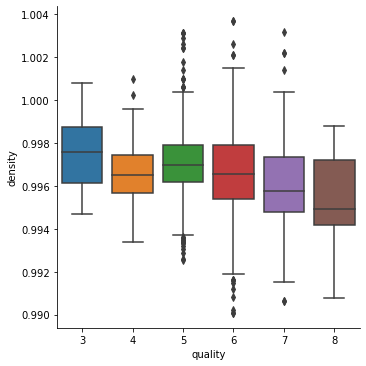

In [543]:
sns.catplot(x="quality",y="density",kind="box",data=Wine_Quality)
#the outliers are highest when the quality is 5
#median is the highest when the quality is 3 where density is 0.996

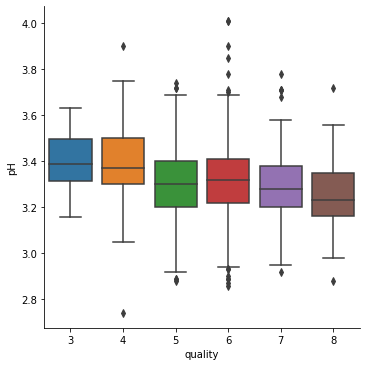

In [544]:
sns.catplot(x="quality",y="pH",kind="box",data=Wine_Quality)
#the outliers are highest when the quality is 6
#median is the highest when the quality is 3 where pH is 3.3

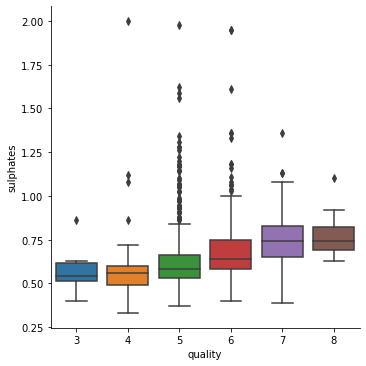

In [545]:
sns.catplot(x="quality",y="sulphates",kind="box",data=Wine_Quality)
#the outliers are highest when the quality is 5
#median is the highest when the quality is 7 where pH is 0.62

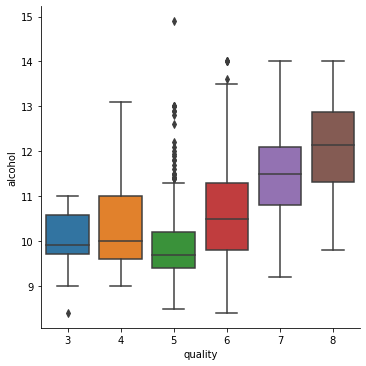

In [546]:
sns.catplot(x="quality",y="alcohol",kind="box",data=Wine_Quality)
#the outliers are highest when the quality is 5
#median is the highest when the quality is 8 where alcohol content is 10.2

#Lets remove outliers. First lets try the zscore method to remove the outliers.
zscore(Wine_Quality)
z=np.abs(zscore(Wine_Quality))
print(z)
print(np.where(z>3))
Wine_Quality_N=Wine_Quality[(z<3).all(axis=1)]

Wine_Quality_N.shape
#We cannot use zscore to eliminate outliers as after using zscore, we are losing around 10% of the data. Hence we will use IQR method to treat the outliers

In [547]:
#Lets remove the outliers using IQR method
#Removing outliers from fixed acidity

Q1_1=Wine_Quality["fixed acidity"].quantile(0.25)
Q3_1=Wine_Quality["fixed acidity"].quantile(0.75)
IQR1=Q3_1-Q1_1
print(Q1_1,Q3_1,IQR1)
lower_boundary_1=Q1_1-(1.5*IQR1)
upper_boundary_1=Q3_1+(1.5*IQR1)
Wine_Quality["fixed acidity"].values[Wine_Quality["fixed acidity"]>upper_boundary_1]=np.NaN

#Removing outliers from volatile acidity
Q1_2=Wine_Quality["volatile acidity"].quantile(0.25)
Q3_2=Wine_Quality["volatile acidity"].quantile(0.75)
IQR2=Q3_2-Q1_2
print(Q1_2,Q3_2,IQR2)
lower_boundary_2=Q1_2-(1.5*IQR2)
upper_boundary_2=Q3_2+(1.5*IQR2)
Wine_Quality["volatile acidity"].values[Wine_Quality["volatile acidity"]>upper_boundary_2]=np.NaN

#Removing outliers from residual sugar
Q1_3=Wine_Quality["residual sugar"].quantile(0.25)
Q3_3=Wine_Quality["residual sugar"].quantile(0.75)
IQR3=Q3_3-Q1_3
print(Q1_3,Q3_3,IQR3)
lower_boundary_3=Q1_3-(1.5*IQR3)
upper_boundary_3=Q3_3+(1.5*IQR3)
Wine_Quality["residual sugar"].values[Wine_Quality["residual sugar"]>upper_boundary_3]=np.NaN


#Removing outliers from chlorides
Q1_4=Wine_Quality["chlorides"].quantile(0.25)
Q3_4=Wine_Quality["chlorides"].quantile(0.75)
IQR4=Q3_4-Q1_4
print(Q1_4,Q3_4,IQR4)
lower_boundary_4=Q1_4-(1.5*IQR4)
upper_boundary_4=Q3_4+(1.5*IQR4)
Wine_Quality["chlorides"].values[Wine_Quality["chlorides"]>upper_boundary_4]=np.NaN
Wine_Quality["chlorides"].values[Wine_Quality["chlorides"]<lower_boundary_4]=np.NaN

#Removing outliers from free sulfur dioxide
Q1_5=Wine_Quality["free sulfur dioxide"].quantile(0.25)
Q3_5=Wine_Quality["free sulfur dioxide"].quantile(0.75)
IQR5=Q3_5-Q1_5
print(Q1_5,Q3_5,IQR5)
lower_boundary_5=Q1_5-(1.5*IQR5)
upper_boundary_5=Q3_5+(1.5*IQR5)
Wine_Quality["free sulfur dioxide"].values[Wine_Quality["free sulfur dioxide"]>upper_boundary_5]=np.NaN

#Removing outliers from total sulfur dioxide
Q1_6=Wine_Quality["total sulfur dioxide"].quantile(0.25)
Q3_6=Wine_Quality["total sulfur dioxide"].quantile(0.75)
IQR6=Q3_6-Q1_6
print(Q1_6,Q3_6,IQR6)
lower_boundary_6=Q1_6-(1.5*IQR6)
upper_boundary_6=Q3_6+(1.5*IQR6)
Wine_Quality["total sulfur dioxide"].values[Wine_Quality["total sulfur dioxide"]>upper_boundary_6]=np.NaN

#Removing outliers from density
Q1_7=Wine_Quality["density"].quantile(0.25)
Q3_7=Wine_Quality["density"].quantile(0.75)
IQR7=Q3_7-Q1_7
print(Q1_7,Q3_7,IQR7)
lower_boundary_7=Q1_7-(1.5*IQR7)
upper_boundary_7=Q3_7+(1.5*IQR7)
Wine_Quality["density"].values[Wine_Quality["density"]>upper_boundary_7]=np.NaN
Wine_Quality["density"].values[Wine_Quality["density"]<lower_boundary_7]=np.NaN

#Removing outliers from pH
Q1_8=Wine_Quality["pH"].quantile(0.25)
Q3_8=Wine_Quality["pH"].quantile(0.75)
IQR8=Q3_8-Q1_8
print(Q1_8,Q3_8,IQR8)
lower_boundary_8=Q1_8-(1.5*IQR8)
upper_boundary_8=Q3_8+(1.5*IQR8)
Wine_Quality["pH"].values[Wine_Quality["pH"]>upper_boundary_8]=np.NaN
Wine_Quality["pH"].values[Wine_Quality["pH"]<lower_boundary_8]=np.NaN

#Removing outliers from sulphates
Q1_9=Wine_Quality["sulphates"].quantile(0.25)
Q3_9=Wine_Quality["sulphates"].quantile(0.75)
IQR9=Q3_9-Q1_9
print(Q1_9,Q3_9,IQR9)
lower_boundary_9=Q1_9-(1.5*IQR9)
upper_boundary_9=Q3_9+(1.5*IQR9)
Wine_Quality["sulphates"].values[Wine_Quality["sulphates"]>upper_boundary_9]=np.NaN

#Removing outliers from sulphates
Q1_10=Wine_Quality["alcohol"].quantile(0.25)
Q3_10=Wine_Quality["alcohol"].quantile(0.75)
IQR10=Q3_10-Q1_10
print(Q1_10,Q3_10,IQR10)
lower_boundary_10=Q1_10-(1.5*IQR10)
upper_boundary_10=Q3_10+(1.5*IQR10)
Wine_Quality["alcohol"].values[Wine_Quality["alcohol"]>upper_boundary_10]=np.NaN

7.1 9.2 2.0999999999999996
0.39 0.64 0.25
1.9 2.6 0.7000000000000002
0.07 0.09 0.01999999999999999
7.0 21.0 14.0
22.0 62.0 40.0
0.9956 0.997835 0.002234999999999987
3.21 3.4 0.18999999999999995
0.55 0.73 0.17999999999999994
9.5 11.1 1.5999999999999996


In [548]:
#Lets replace these nan values with median
Wine_Quality["fixed acidity"]=Wine_Quality["fixed acidity"].fillna(Wine_Quality["fixed acidity"].median())
Wine_Quality["volatile acidity"]=Wine_Quality["volatile acidity"].fillna(Wine_Quality["volatile acidity"].median())
Wine_Quality["residual sugar"]=Wine_Quality["residual sugar"].fillna(Wine_Quality["residual sugar"].median())
Wine_Quality["chlorides"]=Wine_Quality["chlorides"].fillna(Wine_Quality["chlorides"].median())
Wine_Quality["free sulfur dioxide"]=Wine_Quality["free sulfur dioxide"].fillna(Wine_Quality["free sulfur dioxide"].median())
Wine_Quality["total sulfur dioxide"]=Wine_Quality["total sulfur dioxide"].fillna(Wine_Quality["total sulfur dioxide"].median())
Wine_Quality["density"]=Wine_Quality["density"].fillna(Wine_Quality["density"].median())
Wine_Quality["pH"]=Wine_Quality["pH"].fillna(Wine_Quality["pH"].median())
Wine_Quality["sulphates"]=Wine_Quality["sulphates"].fillna(Wine_Quality["sulphates"].median())
Wine_Quality["alcohol"]=Wine_Quality["alcohol"].fillna(Wine_Quality["alcohol"].median())

In [549]:
#Lets check the sknewss of the columns
Wine_Quality.skew()


fixed acidity           0.614884
volatile acidity        0.289724
citric acid             0.318337
residual sugar          0.659258
chlorides               0.209787
free sulfur dioxide     0.800180
total sulfur dioxide    0.951899
density                 0.018819
pH                      0.030546
sulphates               0.612119
alcohol                 0.741352
quality                 0.217802
dtype: float64

In [550]:
#Lets remove the skewness
Wine_Quality["fixed acidity"]=power_transform(Wine_Quality["fixed acidity"].values.reshape(-1,1))
Wine_Quality["residual sugar"]=power_transform(Wine_Quality["residual sugar"].values.reshape(-1,1))
Wine_Quality["free sulfur dioxide"]=power_transform(Wine_Quality["free sulfur dioxide"].values.reshape(-1,1))
Wine_Quality["total sulfur dioxide"]=power_transform(Wine_Quality["total sulfur dioxide"].values.reshape(-1,1))
Wine_Quality["sulphates"]=power_transform(Wine_Quality["sulphates"].values.reshape(-1,1))
Wine_Quality["alcohol"]=power_transform(Wine_Quality["alcohol"].values.reshape(-1,1))

In [551]:
#The skewness has been removed
Wine_Quality.skew()

fixed acidity           0.003196
volatile acidity        0.289724
citric acid             0.318337
residual sugar         -0.008372
chlorides               0.209787
free sulfur dioxide    -0.025675
total sulfur dioxide   -0.018593
density                 0.018819
pH                      0.030546
sulphates               0.018667
alcohol                 0.106685
quality                 0.217802
dtype: float64

In [552]:
Wine_Quality_corr=Wine_Quality.corr()
Wine_Quality_corr["quality"].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.454704
sulphates               0.393424
citric acid             0.226373
fixed acidity           0.094788
residual sugar          0.037331
free sulfur dioxide    -0.047534
pH                     -0.075837
total sulfur dioxide   -0.151051
chlorides              -0.161069
density                -0.164229
volatile acidity       -0.356247
Name: quality, dtype: float64

In [553]:
#Lets start machine learning now by separating x and y variables

In [554]:
x=Wine_Quality.iloc[:,0:-1]
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.431292,0.700,0.00,-0.596165,0.076,-0.263053,-0.090379,0.99780,3.51,-0.590941,-1.075234
1,-0.131363,0.880,0.00,1.025935,0.098,1.095365,0.997467,0.99680,3.20,0.487825,-0.495281
2,-0.131363,0.760,0.04,0.390955,0.092,0.223027,0.640740,0.99700,3.26,0.242749,-0.495281
3,1.799527,0.280,0.56,-0.596165,0.075,0.428526,0.813720,0.99800,3.16,-0.391722,-0.495281
4,-0.431292,0.700,0.00,-0.596165,0.076,-0.263053,-0.090379,0.99780,3.51,-0.590941,-1.075234
...,...,...,...,...,...,...,...,...,...,...,...
1594,-1.473454,0.600,0.08,-0.331931,0.090,1.548952,0.311380,0.99490,3.45,-0.391722,0.311921
1595,-1.774767,0.550,0.10,0.160743,0.062,1.927656,0.547903,0.99512,3.52,1.074093,0.922397
1596,-1.377089,0.510,0.13,0.390955,0.076,1.365561,0.161188,0.99574,3.42,1.005719,0.764422
1597,-1.774767,0.645,0.12,-0.331931,0.075,1.548952,0.311380,0.99547,3.57,0.718556,-0.005872


#Lets perform standard scaler to independent variables.
S=StandardScaler()
x=S.fit_transform(x)
x

In [555]:
x.shape

(1599, 11)

In [556]:
y_1=Wine_Quality.iloc[:,-1]
y_1

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64

In [581]:
y_2=pd.cut(y_1,bins=[0,6,10],labels=["not good/0","good/1"])
y_2.head(10)

0    not good/0
1    not good/0
2    not good/0
3    not good/0
4    not good/0
5    not good/0
6    not good/0
7        good/1
8        good/1
9    not good/0
Name: quality, dtype: category
Categories (2, object): ['not good/0' < 'good/1']

In [582]:
le=LabelEncoder()
y=le.fit_transform(y_2)
y

array([1, 1, 1, ..., 1, 1, 1])

In [583]:
y=pd.DataFrame(y)
y

,0
0,1
1,1
2,1
3,1
4,1
...,...
1594,1
1595,1
1596,1
1597,1


In [584]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1119, 11)
(480, 11)
(1119, 1)
(480, 1)


In [585]:
#Lets use four algorithms to check the accuracy of the whoch model suits the best:1)Logistic Regression,2) KNN,3) Random Forest,4) AdaBoost

In [586]:
#Logistic Regression
lg=LogisticRegression()
lg.fit(x_train,y_train)
#Lets predict the y values
pred1=lg.predict(x_test)
print(accuracy_score(pred1,y_test))
print(confusion_matrix(pred1,y_test))
print(classification_report(pred1,y_test))
score1=cross_val_score(lg,x,y,cv=5)
print(score1)
print(score1.mean())
print(score1.std())

0.8645833333333334
[[ 16  14]
 [ 51 399]]
              precision    recall  f1-score   support

           0       0.24      0.53      0.33        30
           1       0.97      0.89      0.92       450

    accuracy                           0.86       480
   macro avg       0.60      0.71      0.63       480
weighted avg       0.92      0.86      0.89       480

[0.875      0.8625     0.89375    0.88125    0.87774295]
0.8780485893416928
0.010078980819250117


In [599]:
#KNN
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
#lets predict y values
pred2=knn.predict(x_test)
print(accuracy_score(pred2,y_test))
print(confusion_matrix(pred2,y_test))
print(classification_report(pred2,y_test))
score2=cross_val_score(knn,x,y,cv=5)
print(score2)
print(score2.mean())
print(score2.std())

0.8729166666666667
[[ 24  18]
 [ 43 395]]
              precision    recall  f1-score   support

           0       0.36      0.57      0.44        42
           1       0.96      0.90      0.93       438

    accuracy                           0.87       480
   macro avg       0.66      0.74      0.68       480
weighted avg       0.90      0.87      0.89       480

[0.875      0.846875   0.85       0.79375    0.88087774]
0.8493005485893417
0.030821476191459918


In [605]:
#Randomforest
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
#lets predict y values
pred3=rf.predict(x_test)
print(accuracy_score(pred3,y_test))
print(confusion_matrix(pred3,y_test))
print(classification_report(pred3,y_test))
score3=cross_val_score(rf,x,y,cv=5)
print(score3)
print(score3.mean())
print(score3.std())

0.8770833333333333
[[ 33  25]
 [ 34 388]]
              precision    recall  f1-score   support

           0       0.49      0.57      0.53        58
           1       0.94      0.92      0.93       422

    accuracy                           0.88       480
   macro avg       0.72      0.74      0.73       480
weighted avg       0.89      0.88      0.88       480

[0.88125    0.85625    0.890625   0.8375     0.86520376]
0.8661657523510972
0.018690972425920247


In [613]:
#Adaboost
ad=AdaBoostClassifier()
ad.fit(x_train,y_train)
#lets predict y values
pred4=ad.predict(x_test)
print(accuracy_score(pred4,y_test))
print(confusion_matrix(pred4,y_test))
print(classification_report(pred4,y_test))
score4=cross_val_score(ad,x,y,cv=5)
print(score4)
print(score4.mean())
print(score4.std())

0.85625
[[ 24  26]
 [ 43 387]]
              precision    recall  f1-score   support

           0       0.36      0.48      0.41        50
           1       0.94      0.90      0.92       430

    accuracy                           0.86       480
   macro avg       0.65      0.69      0.66       480
weighted avg       0.88      0.86      0.87       480

[0.896875   0.83125    0.8875     0.85       0.85893417]
0.8649118338557994
0.024178848446487038


In [614]:
#As per the above results, it can be concluded that AdaBoost is the best model. Lets hypertune this model using gridsearch cv

In [625]:
#gridsearchcv
parameters={"n_estimators":[60,70,50],"learning_rate":[0.8,1,1.2],"algorithm":["SAMME"],"random_state":[50,42,60] }
grid=GridSearchCV(ad,parameters)
grid.fit(x_train,y_train)

GridSearchCV(estimator=AdaBoostClassifier(),
             param_grid={'algorithm': ['SAMME'], 'learning_rate': [0.8, 1, 1.2],
                         'n_estimators': [60, 70, 50],
                         'random_state': [50, 42, 60]})

In [626]:
print(grid.best_estimator_)
print(grid.best_params_)
print(grid.best_score_)

AdaBoostClassifier(algorithm='SAMME', learning_rate=1, n_estimators=70,
                   random_state=50)
{'algorithm': 'SAMME', 'learning_rate': 1, 'n_estimators': 70, 'random_state': 50}
0.8936619154388212


In [629]:
#Now put these parameters back to best fit model which is adaboost

ad=AdaBoostClassifier(algorithm="SAMME",learning_rate=1,n_estimators=70,random_state=50)
ad.fit(x_train,y_train)
#lets find the y values with this best fit model
pred4=ad.predict(x_test)
print(accuracy_score(pred4,y_test))
print(confusion_matrix(pred4,y_test))
print(classification_report(pred4,y_test))

0.8541666666666666
[[ 17  20]
 [ 50 393]]
              precision    recall  f1-score   support

           0       0.25      0.46      0.33        37
           1       0.95      0.89      0.92       443

    accuracy                           0.85       480
   macro avg       0.60      0.67      0.62       480
weighted avg       0.90      0.85      0.87       480



In [634]:
y_pred_prob=ad.predict_proba(x_test)[:,1]
y_pred_prob

array([0.55462726, 0.63363093, 0.61964014, 0.63462223, 0.60143235,
       0.62806361, 0.59851664, 0.58692881, 0.53007722, 0.54062651,
       0.50855979, 0.56935742, 0.56570727, 0.6344774 , 0.62153531,
       0.50256367, 0.60282444, 0.55320444, 0.48026917, 0.56953328,
       0.55797469, 0.61399103, 0.5322867 , 0.52815171, 0.59500264,
       0.56061064, 0.48267967, 0.56598488, 0.5937129 , 0.55382942,
       0.61841271, 0.56530486, 0.5488391 , 0.57894966, 0.56197592,
       0.62722331, 0.522977  , 0.52140611, 0.56648539, 0.54168014,
       0.58935933, 0.61683195, 0.50000148, 0.56632903, 0.58214537,
       0.57555104, 0.51854166, 0.59148804, 0.58400483, 0.54975436,
       0.60433538, 0.60193401, 0.56849665, 0.5393278 , 0.65261303,
       0.60236217, 0.54103069, 0.5427925 , 0.57110698, 0.59023723,
       0.5318712 , 0.52504235, 0.60342131, 0.60612198, 0.47577649,
       0.62190066, 0.48481817, 0.55821907, 0.47308017, 0.60176818,
       0.50072876, 0.63288611, 0.55760758, 0.5913262 , 0.49805

In [636]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
print(fpr)
print(tpr)
print(thresholds)

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.01492537
 0.01492537 0.01492537 0.01492537 0.01492537 0.01492537 0.01492537
 0.04477612 0.04477612 0.04477612 0.04477612 0.05970149 0.05970149
 0.05970149 0.07462687 0.07462687 0.08955224 0.08955224 0.08955224
 0.08955224 0.08955224 0.08955224 0.08955224 0.08955224 0.10447761
 0.10447761 0.11940299 0.11940299 0.13432836 0.13432836 0.1641791
 0.1641791  0.19402985 0.19402985 0.19402985 0.19402985 0.19402985
 0.19402985 0.2238806  0.2238806  0.23880597 0.23880597 0.25373134
 0.25373134 0.26865672 0.26865672 0.26865672 0.26865672 0.29850746
 0.29850746 0.37313433 0.37313433 0.3880597  0.3880597  0.40298507
 0.40298507 0.41791045 0.41791045 0.

Text(0.5, 1.0, 'AdaBoost')

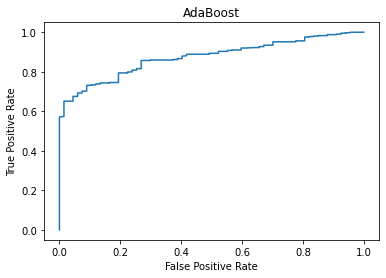

In [638]:
plt.plot(fpr,tpr,label="AdaBoost")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AdaBoost")

Lets perform Serialisation and deserialisation to dump (save) and load the model


In [642]:
joblib.dump(ad,"adfile.obj")
ad_from_joblib=joblib.load("adfile.obj")